### SFD and BMD Calculator

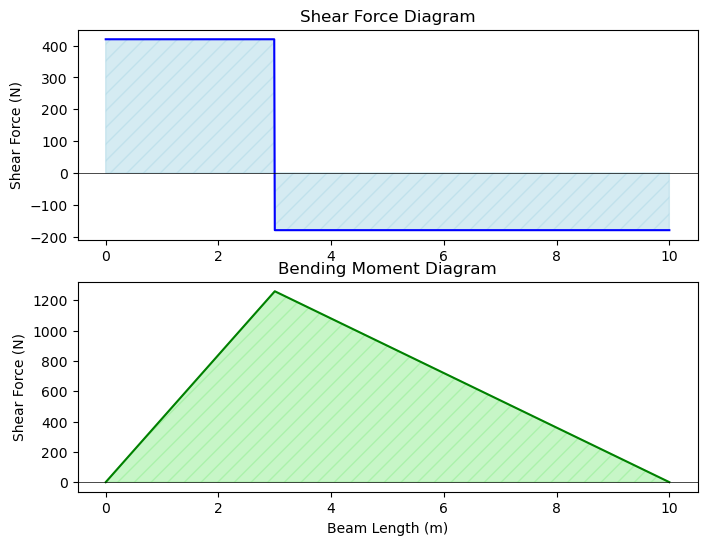

In [14]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# create gui window
beam_win = tk.Tk()
beam_win.title("SFD and BMD Calculator: Simply Supported Beam")

pad_x = 0
pad_y = 5

# label for beam length
l_length = ttk.Label(beam_win,text="Length of the Beam L (m):")
l_length.grid(row=0,column=0,padx=pad_x,pady=pad_y)
entry_L = ttk.Entry(beam_win)
entry_L.grid(row=0,column=1,padx=pad_x,pady=pad_y)

# label for Point Load
l_load = ttk.Label(beam_win,text="Value of the Point Load P (N):")
l_load.grid(row=1,column=0,padx=pad_x,pady=pad_y)
entry_load = ttk.Entry(beam_win)
entry_load.grid(row=1,column=1,padx=pad_x,pady=pad_y)

# label for distance of point load from left side
l_la = ttk.Label(beam_win,text="Distance of P from Left End la (m):")
l_la.grid(row=2,column=0,padx=pad_x,pady=pad_y)
entry_la = ttk.Entry(beam_win)
entry_la.grid(row=2,column=1,padx=pad_x,pady=pad_y)

def sfd_bmd():
    L = float(entry_L.get())
    la = float(entry_la.get())
    P = float(entry_load.get())

    Ra = P*(1-(la/L)) # reaction of left side
    Rb = P-Ra

    SF = []
    Lb = []
    Mb = []

    for x in np.arange(0,L+0.01,0.01):
        if x < la:
            sf = Ra
            m = Ra*x
        else:
            sf = Ra - P
            m = (Ra*x)-(P*(x-la))
        Lb.append(x)
        SF.append(sf)
        Mb.append(m)

    fig.clear()

    # plot shear force
    ax1 = fig.add_subplot(211)
    ax1.plot(Lb,SF,color='blue')
    ax1.fill_between(Lb,SF,color='lightblue',alpha=0.5,hatch='//')
    ax1.axhline(0,color='black',lw=0.5)
    ax1.set_title("Shear Force Diagram")
    ax1.set_ylabel("Shear Force (N)")

    # plot bending moment
    ax1 = fig.add_subplot(212)
    ax1.plot(Lb,Mb,color='green')
    ax1.fill_between(Lb,Mb,color='lightgreen',alpha=0.5,hatch='//')
    ax1.axhline(0,color='black',lw=0.5)
    ax1.set_title("Bending Moment Diagram")
    ax1.set_xlabel("Beam Length (m)")
    ax1.set_ylabel("Shear Force (N)")
    fig.subplot_adjust(left=0.1,hspace=0.4)
    
    canvas.draw()
# Button to display plot
plot_button = ttk.Button(beam_win, text='Plot sfd and bmd',command=sfd_bmd)
plot_button.grid(row=3,column=0,columnspan=2)

fig = plt.figure(figsize=(8,6),dpi=100)
canvas = FigureCanvasTkAgg(fig,beam_win)
canvas.get_tk_widget().grid(row=4,column=0,columnspan=2)

# display gui window
beam_win.mainloop()